<a href="https://colab.research.google.com/github/raulc66/AI-Learning/blob/main/ANN_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Installation and Setup

In [1]:
# Installing Tensorflow
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2 : Data Preprocessing


In [4]:
# importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [5]:
# Loading the dataset
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
x_train.shape , x_test.shape # the dimension of the pictures is 28 x 28 (28 pixels)

((60000, 28, 28), (10000, 28, 28))

In [7]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [8]:
np.max(x_train) , np.min(x_train), np.mean(x_train) # the pixel values

(255, 0, 72.94035223214286)

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
np.max(y_train) , np.min(y_train), np.mean(y_train)

(9, 0, 4.5)

In [11]:
class_names = ['0 Top/T-shirt','1 Trouser', '2 Pullover', '3 Dress', '4 Coat', 'Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle Boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', 'Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle Boot']


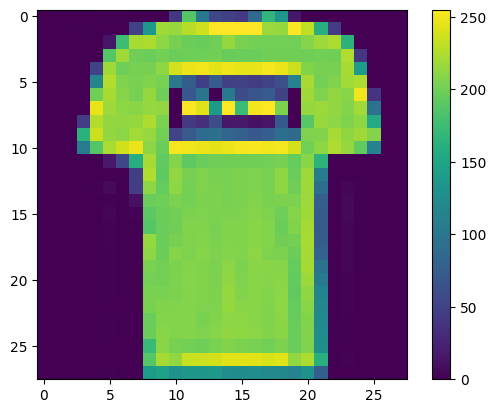

In [12]:
# Data exploration
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [13]:
y_train[1] # 0 - Top/T-shirt

0

In [14]:
# Normalizing the dataset - improves the learning rate of the neural network
x_train = x_train / 255.0 # the number of samples / total number of pixels
x_test = x_test / 255.0

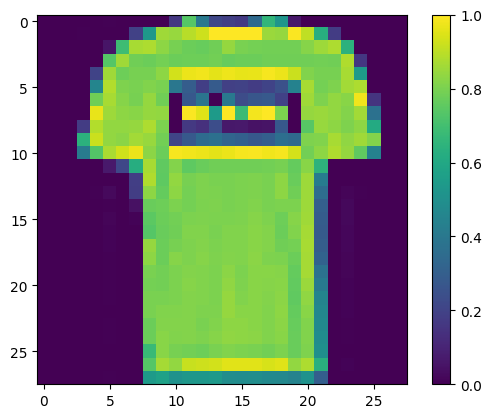

In [15]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [16]:
# Flattening the dataset
x_train.shape, x_test.shape # 3-d shaped arrays : label , dimension of image

((60000, 28, 28), (10000, 28, 28))

In [17]:
x_train = x_train.reshape(-1 , 28 * 28) # selecting all the labels in the dataset + converting 2-dimension array into a 1 dimension vector (28 , 28) --> 784 ( 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [18]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [19]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Step 3 : Building the Model

In [20]:
# Define an object
model = tf.keras.models.Sequential() # we are creating a fully connected neural network (a series of dense layers)
# Sequence of layers

In [21]:
# Adding first fully connected hidden layer
# 1) Number of neurons = 128
# 2) activation function = ReLU --> adding non-linearity to the model
# 3) Input shape = 784 --> flattened datashape --> it takes as input the number represented by the 28*28 pixels
model.add(tf.keras.layers.Dense(units = 128, activation='relu', input_shape = (784,)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Adding the second layer with dropout
model.add(tf.keras.layers.Dropout(0.3)) # dropping 30 percent of neurons
# regularization technique, prevents overfitting

In [23]:
# Adding the output layer
# 1) units = 10 --> The total number of classes
# 2) activation = softmax --> for multiple outputs | sigmoid function for the binary outputs
model.add(tf.keras.layers.Dense(10, activation='softmax'))


# Step 4 : Training the model

In [25]:
# Compiling the model
# 1) Optimizer - > adam, minimize the loss function
# 2) loss function -> sparse_categorical_crossentropy --> acts as guide to optimizer
# 3) metrics - > sparse_categorical_accuracy

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Training the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.7059 - sparse_categorical_accuracy: 0.7528
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.4206 - sparse_categorical_accuracy: 0.8476
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3913 - sparse_categorical_accuracy: 0.8582
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.3635 - sparse_categorical_accuracy: 0.8662
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3528 - sparse_categorical_accuracy: 0.8713
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.3413 - sparse_categorical_accuracy: 0.8740
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.3266 - sparse_categorical_accuracy: 0.8802
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3166 - sparse_categorical_accuracy: 0.8802
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.3194 - sparse_categorical_accuracy: 0.8817
Epoch 10/10
1875/1875 ━━━━━━━━━━

# Step : 5  Model evaluation and prediction


In [29]:
# Model evaluation
test_loss , test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3504 - sparse_categorical_accuracy: 0.8747


In [30]:
print(f"Test accuracy : {test_accuracy}")

Test accuracy : 0.8740000128746033


In [33]:
# Model prediction
# deprecated : y_pred = model.predict_classes(x_test)
y_pred = tf.math.argmax(model.predict(x_test), axis=-1).numpy() # predicts the index of the highest value from a matrix composed of rows, each row is a class


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [34]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [41]:
print(f"Predicted output : {y_pred[110]}")  # predicted output
print(f"Actual output : {y_test[110]}") # actual class

Predicted output : 2
Actual output : 2


In [42]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', 'Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle Boot']


In [44]:
# Confusion metrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[841   2  16  50   1   2  85   0   3   0]
 [  1 961   1  31   2   0   3   0   1   0]
 [ 13   1 828  18  67   1  71   1   0   0]
 [ 18   4   4 938  13   0  22   0   1   0]
 [  0   1 135  65 725   0  73   0   1   0]
 [  0   0   0   0   0 961   0  21   1  17]
 [171   1 104  48  57   0 613   0   6   0]
 [  0   0   0   0   0  14   0 965   0  21]
 [  7   0   3   8   3   6   8   6 959   0]
 [  1   0   0   0   0   7   0  43   0 949]]


In [45]:
acc_cm = accuracy_score(y_test, y_pred)

In [46]:
print(acc_cm)

0.874
